<a href="https://colab.research.google.com/github/nurfawa/FinalYearProject/blob/FinalYearProject/SizeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 2: Test on Different Plaintext Size

Made by: Nur Fahima Iwani binti Ahmad Irwan (CS010181428)

Title: Investigating The Impact of Grover's Algorithm on AES's S-Box

#Plaintexts used in the experiment

In [ ]:
# Generate 1KB plaintext
plaintext_1kb = ("This is a sample plaintext. It is used for testing the encryption algorithm. Let's repeat this pattern until we reach 1KB. " * 16).encode('utf-8')

# Generate 1MB plaintext
plaintext_1mb = ("This is a 1MB plaintext used to test the encryption algorithm. " * 20000).encode('utf-8')

# Generate 10MB plaintext
plaintext_10mb = ("This is a 10MB plaintext used to test the encryption algorithm. " * 200000).encode('utf-8')

# Generate 50MB plaintext
plaintext_50mb = ("This is a 50MB plaintext used to test the encryption algorithm. " * 1000000).encode('utf-8')

# Generate 100MB plaintext
plaintext_100mb = ("This is a 100MB plaintext used to test the encryption algorithm. " * 2000000).encode('utf-8')

# Generate 200MB plaintext
plaintext_200mb = ("This is a 200MB plaintext used to test the encryption algorithm. " * 4000000).encode('utf-8')


# Save to files if needed
with open('plaintext_1kb.txt', 'wb') as f:
    f.write(plaintext_1kb)

with open('plaintext_1mb.txt', 'wb') as f:
    f.write(plaintext_1mb)

with open('plaintext_10mb.txt', 'wb') as f:
    f.write(plaintext_10mb)

with open('plaintext_50mb.txt', 'wb') as f:
    f.write(plaintext_50mb)

with open('plaintext_100mb.txt', 'wb') as f:
    f.write(plaintext_100mb)

with open('plaintext_200mb.txt', 'wb') as f:
    f.write(plaintext_200mb)


#Step 1: Installing open source framework for programming quantum computers, Google Cirq

In [ ]:
!pip install cirq

  Using cached cirq-1.4.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached cirq_aqt-1.4.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached cirq_core-1.4.1-py3-none-any.whl.metadata (1.8 kB)
  Using cached cirq_google-1.4.1-py3-none-any.whl.metadata (2.0 kB)
  Using cached cirq_ionq-1.4.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached cirq_pasqal-1.4.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached cirq_rigetti-1.4.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached cirq_web-1.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached duet-0.2.9-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyquil-4.14.2-py3-none-any.whl.metadata (10 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached qcs_sdk_python-0.19.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (6.2 kB)
  Using cached quil-0.11.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached

#Step 2: Installing Python package of low-level cryptographic primitives (Pycryptodome)

In [ ]:
!pip install PyCryptodome

#Test 1: 1KB data

Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 115, 97, 109, 112, 108, 101]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 143, 239, 60, 81, 80, 77]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 143, 239, 60, 81, 80, 77]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 296, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │         

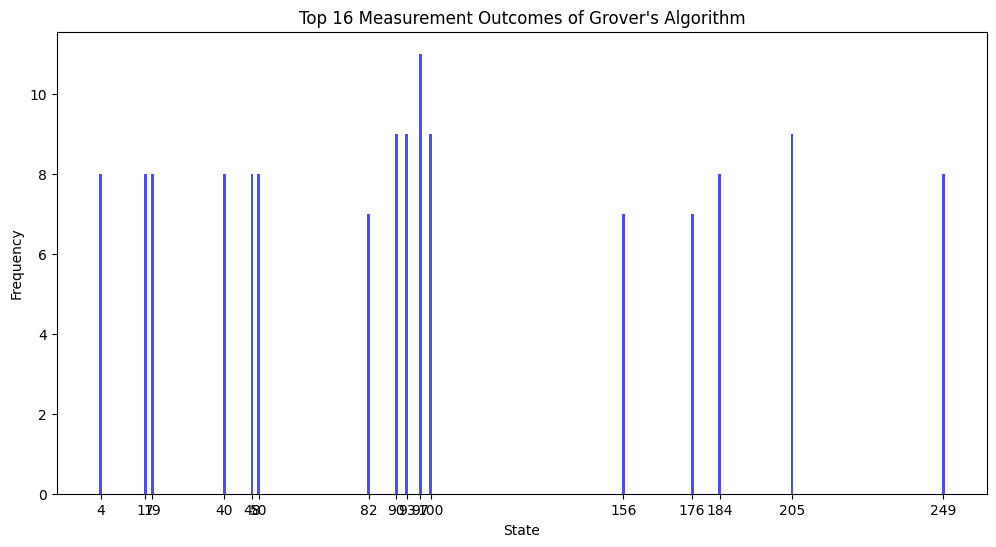

Number of Qubits: 8
Number of Gates: 329
Number of X Pauli Gates: 296
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 1.11 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate


def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_1kb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


In [ ]:
import cirq

# Function to set up the quantum circuit (based on your earlier code)
def setup_quantum_circuit(num_qubits, target_output, iterations):
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits

# Example usage to generate the circuit
num_qubits = 8
target_output = 42  # Example target output
iterations = optimal_iterations(num_qubits)
circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)

# Print the circuit as ASCII art
print(circuit)


0: ───X───H───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │       │
1: ───X───H───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───M─────────────
                  │           │           │           │       

In [ ]:
# Export the circuit to LaTeX
latex_code = cirq.contrib.circuit_to_latex_using_qcircuit(circuit)

# Save LaTeX code to a file
with open('quantum_circuit.tex', 'w') as f:
    f.write(latex_code)

# Or just print the LaTeX code to the console
print(latex_code)


\Qcircuit @R=1em @C=0.75em {
 \\
 &\lstick{\text{q(0)}}& \qw&\targ \qw&\gate{\text{H}} \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\targ \qw&      \qw&\multigate{2}{\text{TOFFOLI}} \qw&\

#Test 2: 1MB data

Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 49, 77, 66, 32, 112, 108]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 227, 44, 183, 81, 80]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 227, 44, 183, 81, 80]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 272, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │          

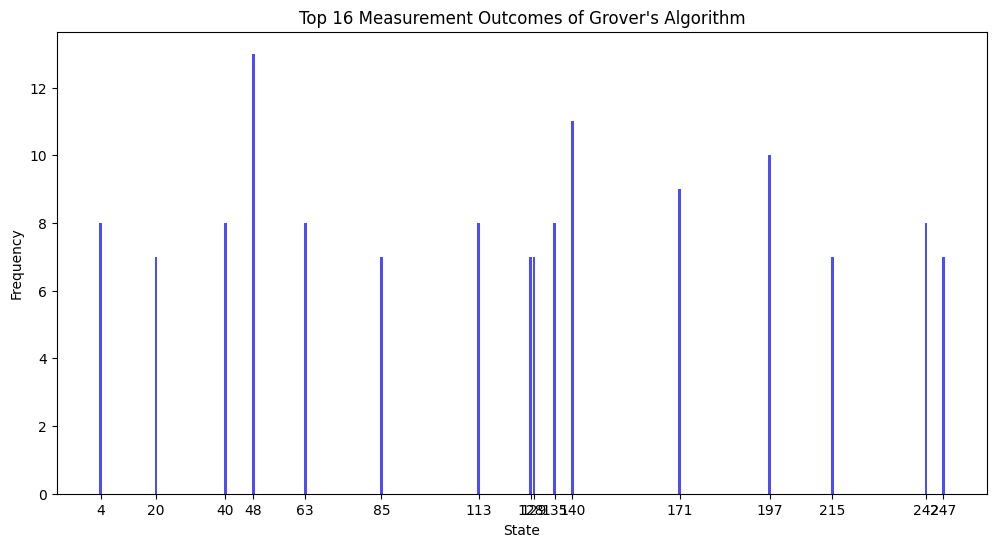

Number of Qubits: 8
Number of Gates: 305
Number of X Pauli Gates: 272
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 0.29 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate


def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_1mb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


#Test 3: 10MB data


Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 49, 48, 77, 66, 32, 112]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 4, 227, 44, 183, 81]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 4, 227, 44, 183, 81]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 248, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │ 

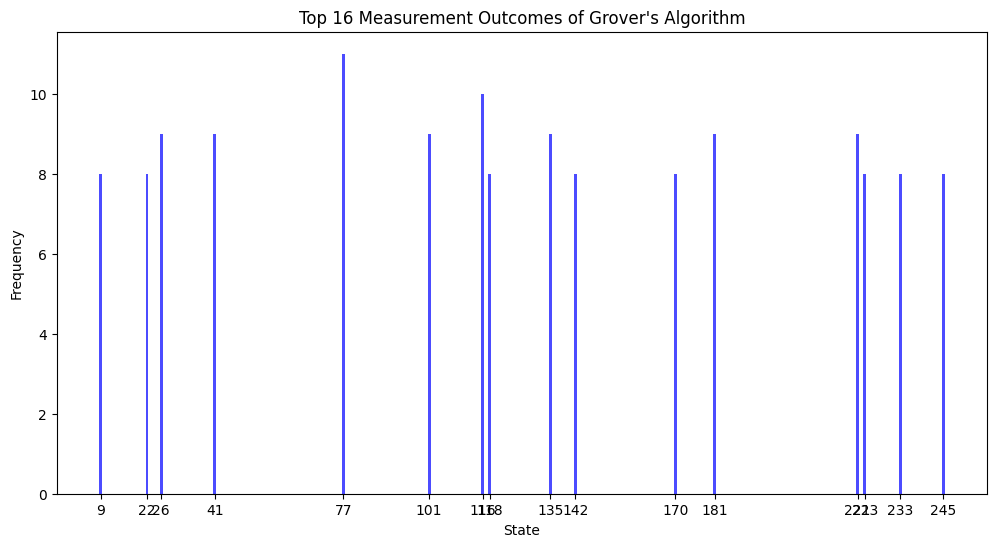

Number of Qubits: 8
Number of Gates: 281
Number of X Pauli Gates: 248
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 24.23 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate

def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_10mb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


#Test 4: 50MB data

Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 53, 48, 77, 66, 32, 112]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 150, 4, 227, 44, 183, 81]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 150, 4, 227, 44, 183, 81]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 248, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───────@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │ 

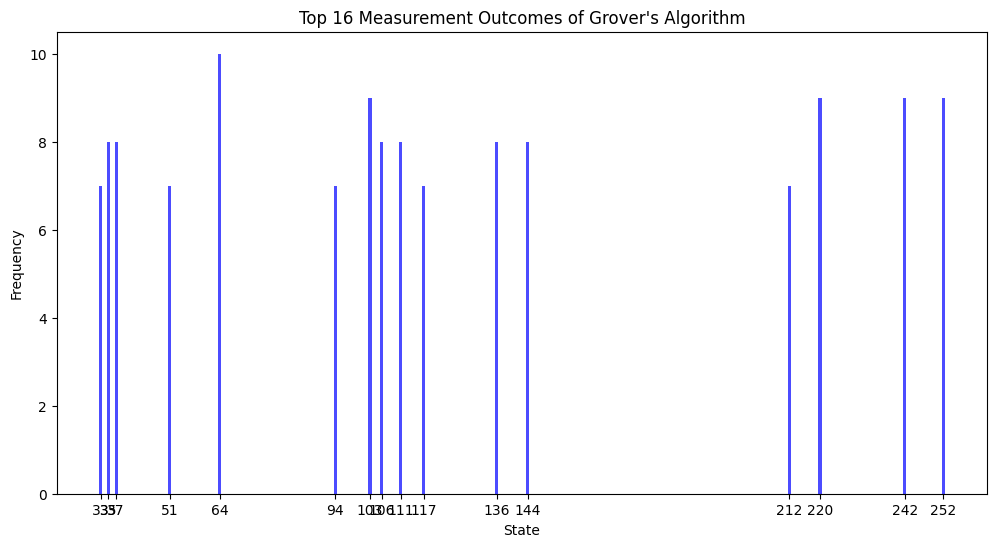

Number of Qubits: 8
Number of Gates: 281
Number of X Pauli Gates: 248
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 61.17 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate

def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_50mb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


#Test 5: 100MB data

Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 49, 48, 48, 77, 66, 32]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 4, 4, 227, 44, 183]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 199, 4, 4, 227, 44, 183]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 296, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │    

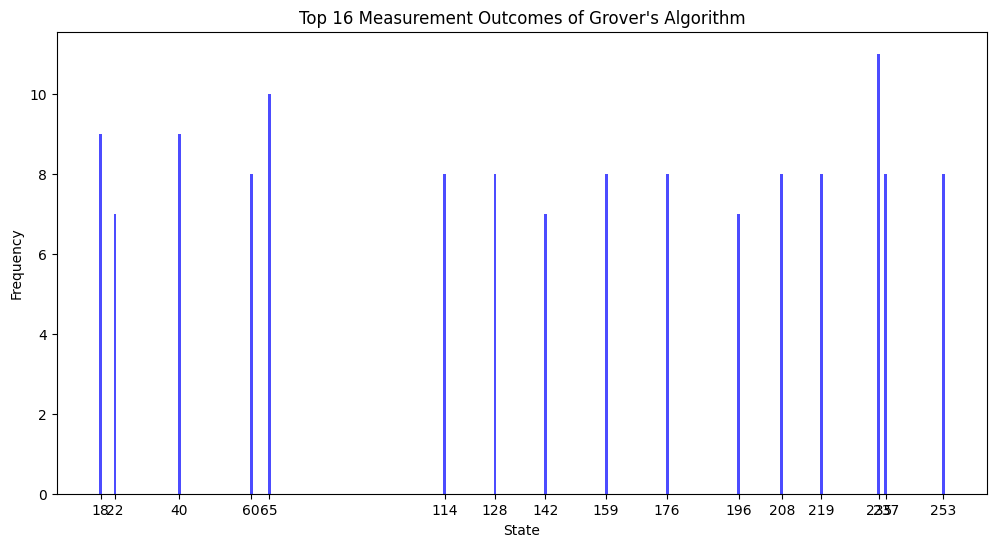

Number of Qubits: 8
Number of Gates: 329
Number of X Pauli Gates: 296
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 124.16 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate

def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_100mb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


#Test 6: 200MB data

Original plaintext bytes: [84, 104, 105, 115, 32, 105, 115, 32, 97, 32, 50, 48, 48, 77, 66, 32]
Actual S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 35, 4, 4, 227, 44, 183]
Expected S-box output: [32, 69, 249, 143, 183, 249, 143, 183, 239, 183, 35, 4, 4, 227, 44, 183]
Match Rate: 100.00%
Success: Quantum result matches classical S-box output.
Circuit Depth: 75
Gate Counts: {'X': 344, 'H': 8, 'CX': 0, 'CCX': 24, 'Other': 1}
Circuit:
 0: ───X───H───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───M('result')───
                  │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │      

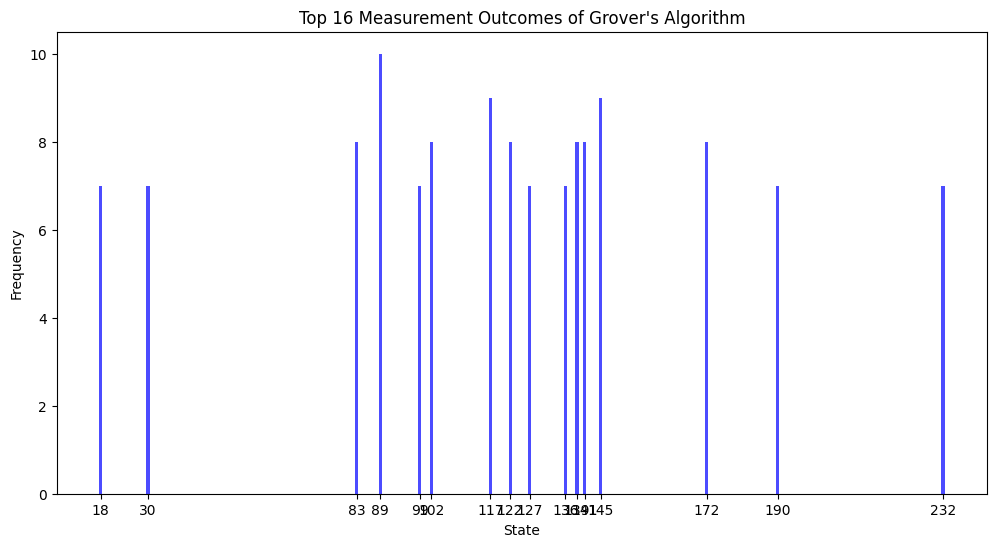

Number of Qubits: 8
Number of Gates: 377
Number of X Pauli Gates: 344
Number of Hadamard Gates: 8
Number of CNOT Gates: 0
Number of Toffoli Gates: 24
Number of Other Gates: 1
Number of Iterations: 12
Memory Usage: 248.00 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES


# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def read_plaintext_from_file(file_path):
    """Read plaintext from a file and return it as bytes."""
    with open(file_path, 'rb') as file:
        plaintext = file.read()
    return plaintext

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def calculate_match_rate(actual_output, expected_output):
    """
    Calculate the match rate between the actual S-box output and the expected S-box output.

    Args:
    actual_output (list): The actual output from the S-box simulation.
    expected_output (list): The expected output for comparison.

    Returns:
    float: The match rate as a percentage.
    """
    matches = sum(1 for a, e in zip(actual_output, expected_output) if a == e)
    match_rate = (matches / len(expected_output)) * 100
    return match_rate

def main():
    secret_key = b'nur fahima iwani'
    file_path = '/content/plaintext_200mb.txt'  # Update with your plaintext file path
    plaintext = read_plaintext_from_file(file_path)
    initial_memory = get_memory_usage()

     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)

    match_rate = calculate_match_rate(actual_sbox_output[:16], expected_sbox_output)
    print(f"Match Rate: {match_rate:.2f}%")

    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth, gate_counts):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of X Pauli Gates: {gate_counts['X']}")
    print(f"Number of Hadamard Gates: {gate_counts['H']}")
    print(f"Number of CNOT Gates: {gate_counts['CX']}")
    print(f"Number of Toffoli Gates: {gate_counts['CCX']}")
    print(f"Number of Other Gates: {gate_counts['Other']}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()
